In [1]:
# read data, and follow proteomics analysis.
# test if I get similar results using TPMs

In [2]:
import os,sys,pandas,numpy
import matplotlib,matplotlib.pyplot

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

# 1. User defined variables

In [3]:
transcriptomics_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/rld_E.csv'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/'

# 2. Read data

In [4]:
df=pandas.read_csv(transcriptomics_file,sep=',',index_col=0)
print(df.shape)
df.head()

(11060, 6)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906


# 3. Variable exploration

In [5]:
df['HMDM.mean']=df.loc[:,['HMDM.1','HMDM.2']].mean(axis=1)
df['THP1.mean']=df.loc[:,['THP1.1','THP1.2']].mean(axis=1)
df['iMac.mean']=df.loc[:,['iMac.1','iMac.2']].mean(axis=1)
df['Mean']=df.loc[:,['HMDM.mean','THP1.mean','iMac.mean']].mean(axis=1)
df['STD']=df.loc[:,['HMDM.mean','THP1.mean','iMac.mean']].std(axis=1)
df['CV']=df['STD']/df['Mean']
df.head()

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,HMDM.mean,THP1.mean,iMac.mean,Mean,STD,CV
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066,8.149312,13.480461,10.031005,10.553592,2.703722,0.256190
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048,10.738857,10.092357,12.621880,11.151031,1.314168,0.117852
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452,13.347176,12.783117,14.498236,13.542843,0.874141,0.064546
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989,8.710675,9.246527,9.060165,9.005789,0.272033,0.030206
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906,11.270209,12.102369,11.293933,11.555503,0.473748,0.040998


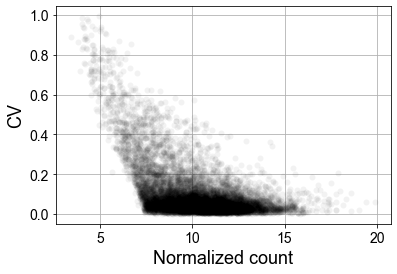

In [6]:
matplotlib.pyplot.plot(df['Mean'],df['CV'],'ok',alpha=0.05,mew=0)
matplotlib.pyplot.xlabel('Normalized count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

In [ ]:
# consider doing the analysis for E and HE separately